Case study 2. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cars.csv')
print('Done')

Done


Visualization

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc = {'figure.figsize': (14,8)})

In [4]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [5]:
df['peak-rpm'].dtypes

dtype('float64')

In [9]:
df[['bore']].corr()

,bore
bore,1.0


In [12]:
df[['bore','stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<Axes: xlabel='engine-size', ylabel='price'>

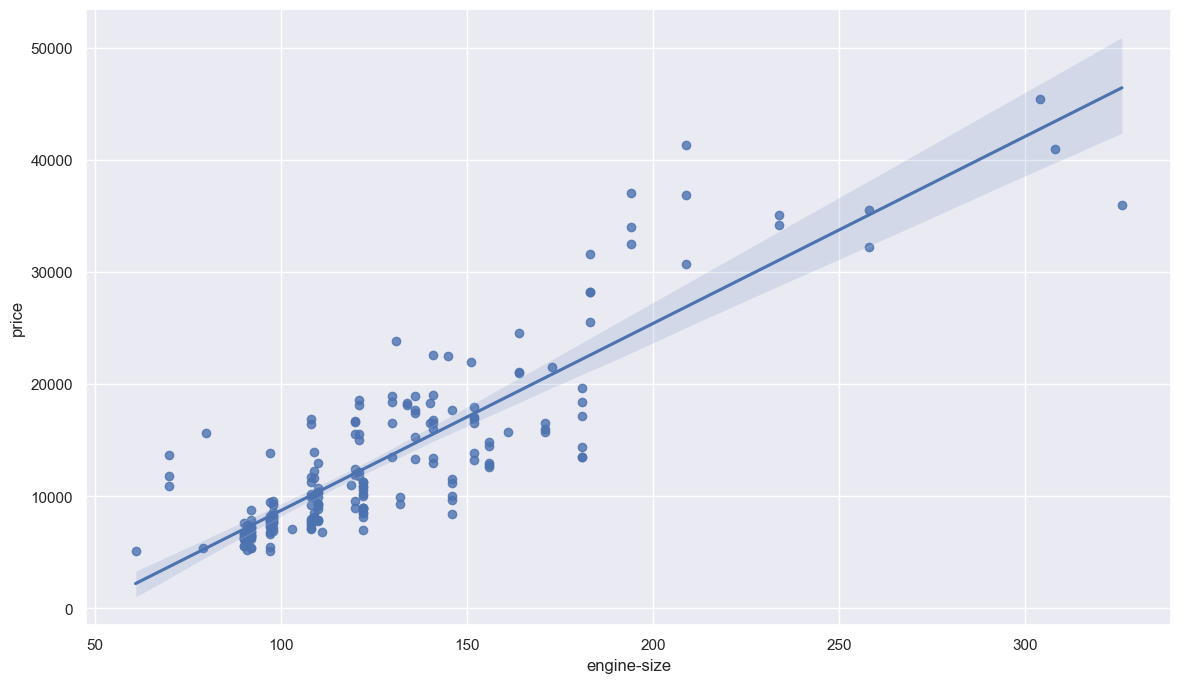

In [14]:
sns.regplot(x = 'engine-size', y = 'price', data = df)
#positiveregress

In [15]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

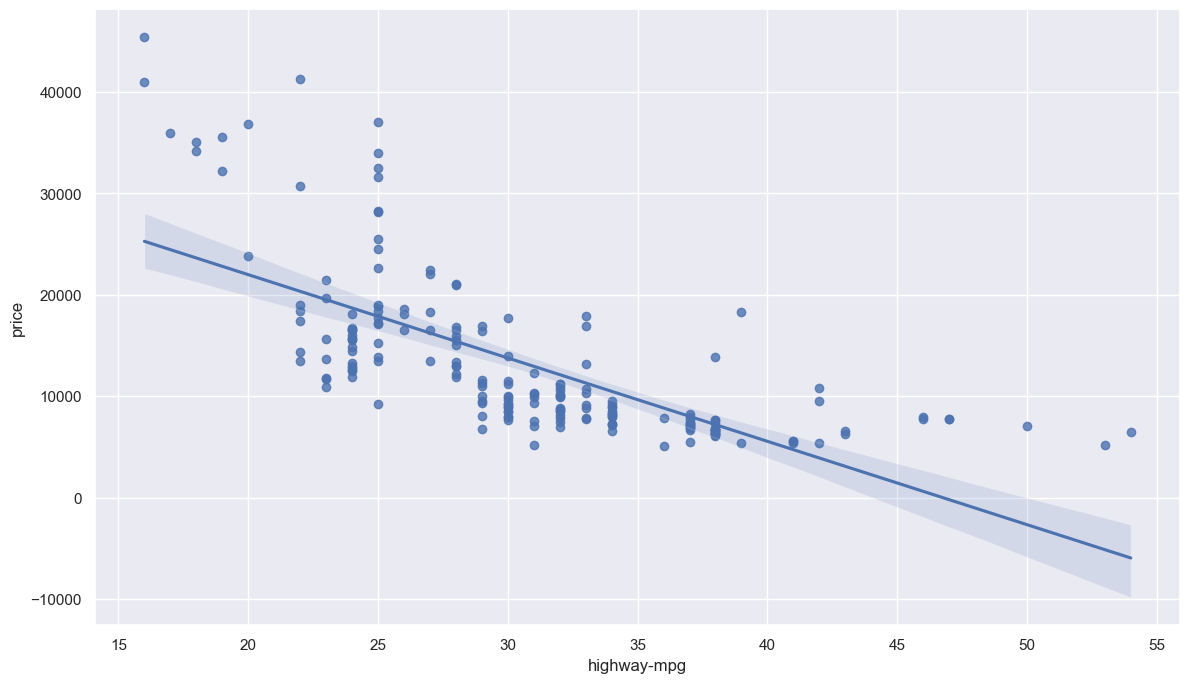

In [16]:
sns.regplot(x = 'highway-mpg', y = 'price', data = df)
#negativeregress

In [17]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

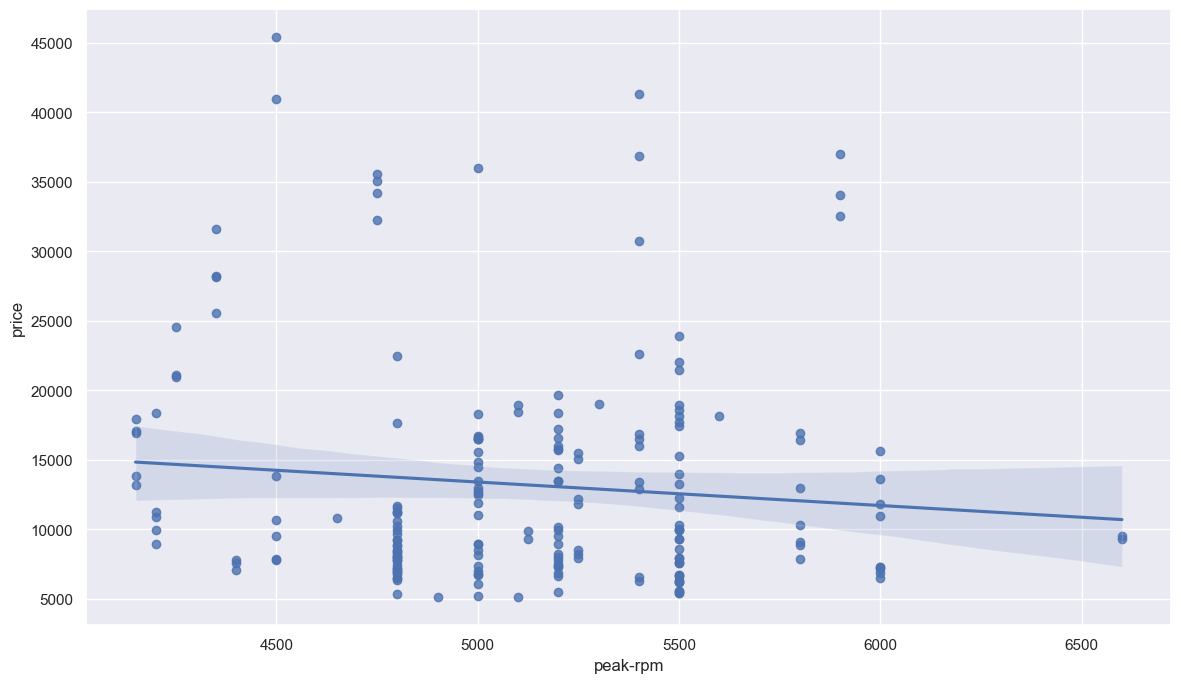

In [20]:
sns.regplot(x = 'peak-rpm', y = 'price', data = df)

In [21]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<Axes: xlabel='stroke', ylabel='price'>

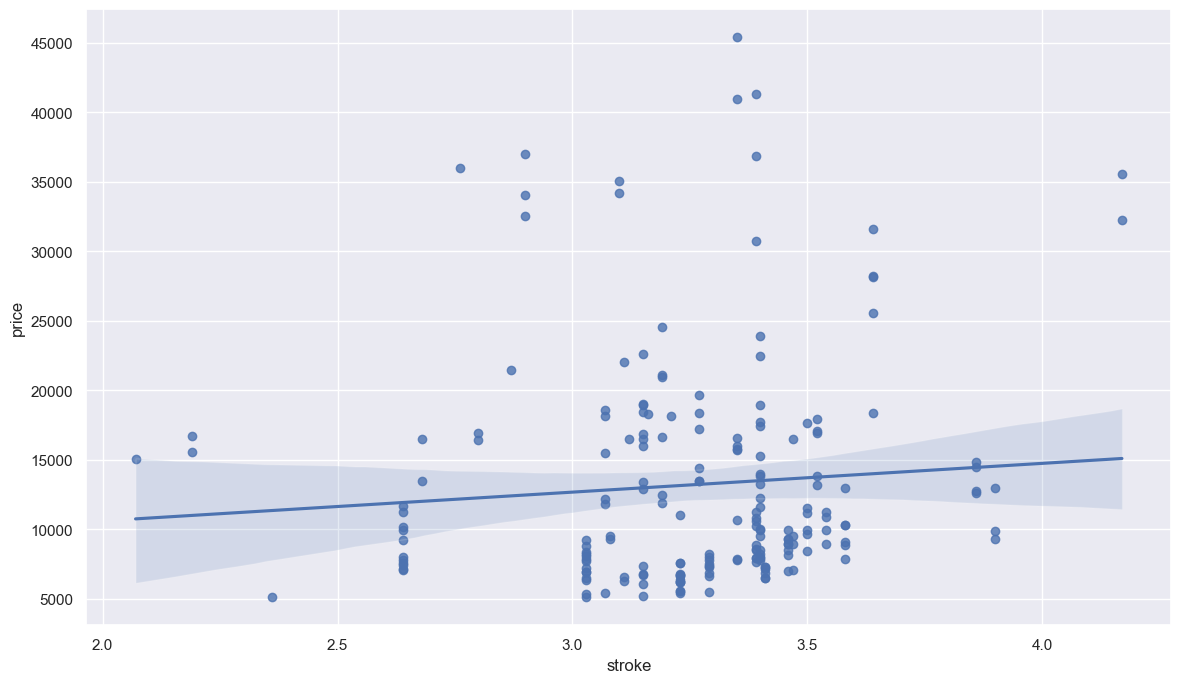

In [22]:
sns.regplot(x = 'stroke', y = 'price', data = df)

In [23]:
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


Caterogical feature

<Axes: xlabel='body-style', ylabel='price'>

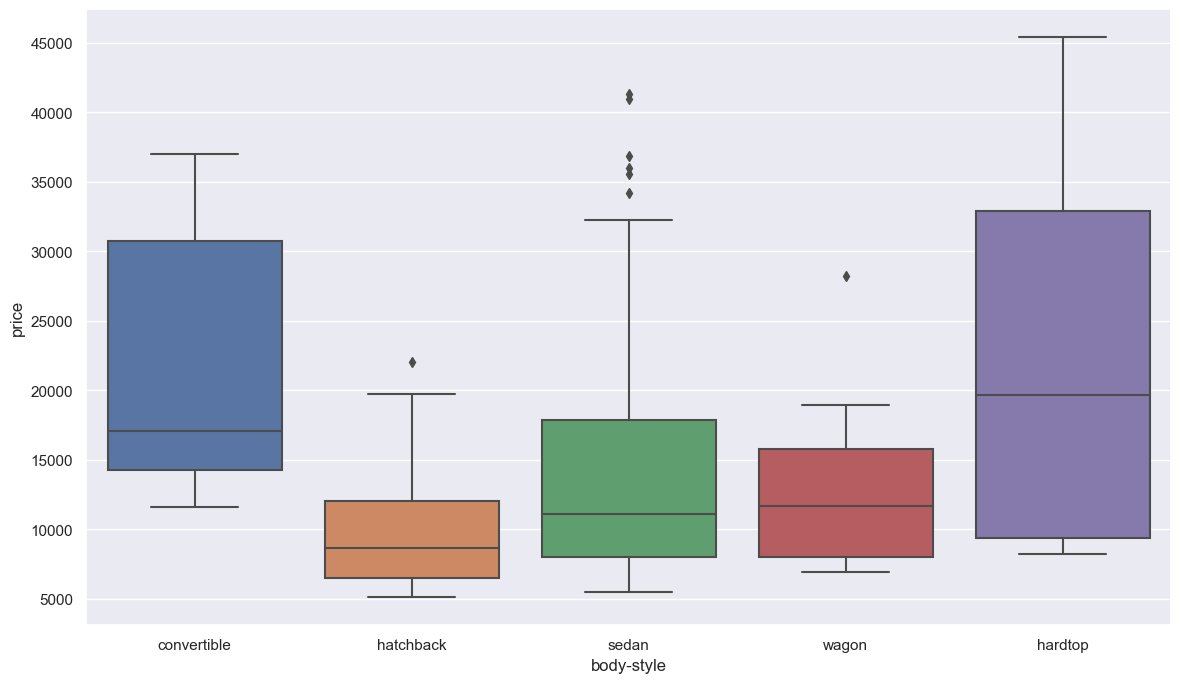

In [24]:
sns.boxplot(x = 'body-style', y = 'price', data = df)

<Axes: xlabel='engine-location', ylabel='price'>

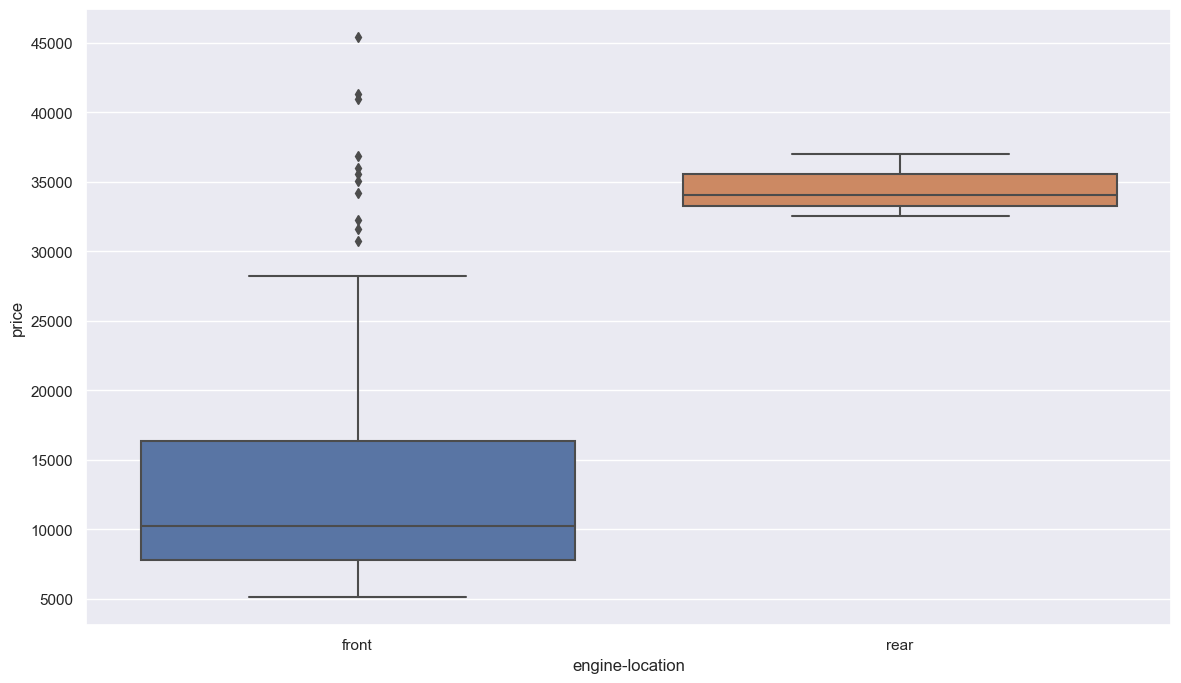

In [25]:
sns.boxplot(x = 'engine-location', y = 'price', data = df)

<Axes: xlabel='drive-wheels', ylabel='price'>

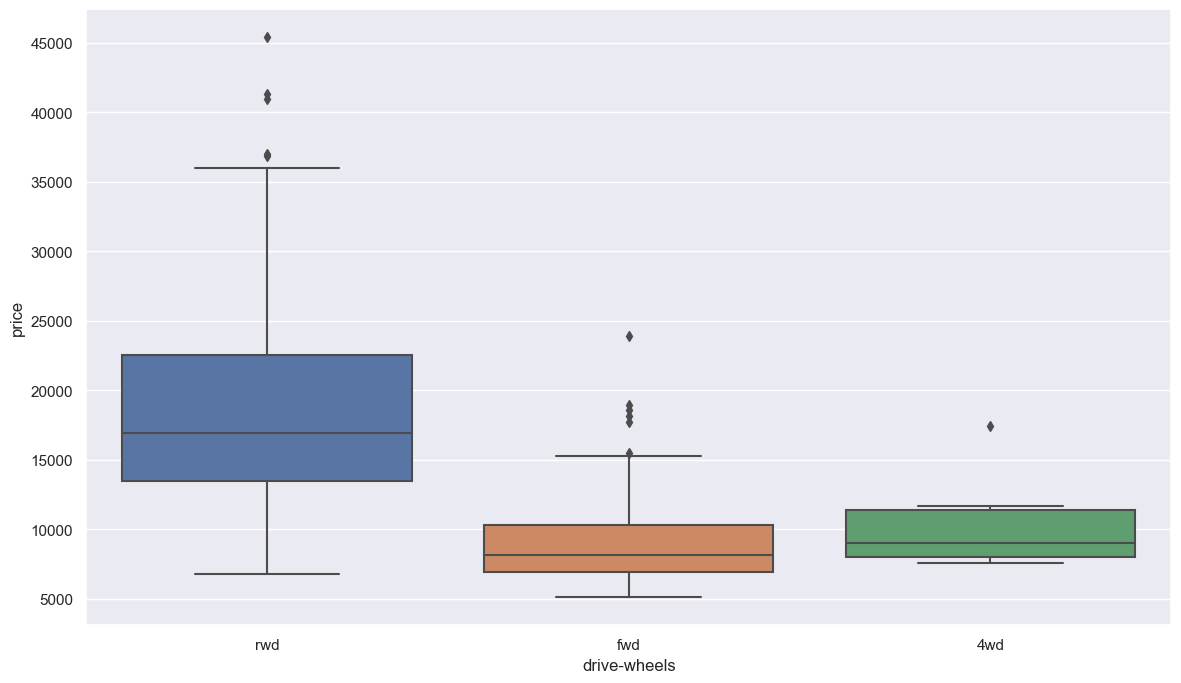

In [26]:
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

3. groupping

In [27]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [28]:
df_group_one = df[['drive-wheels', 'body-style', 'price']]
df_group_one

,drive-wheels,body-style,price
0,rwd,convertible,13495
1,rwd,convertible,16500
2,rwd,hatchback,16500
3,fwd,sedan,13950
4,4wd,sedan,17450
...,...,...,...
196,rwd,sedan,16845
197,rwd,sedan,19045
198,rwd,sedan,21485
199,rwd,sedan,22470


In [30]:
#grouping result
df_group_one = df_group_one.groupby(['drive-wheels'], as_index = False).mean()
df_group_one

/var/folders/bx/cvl0nfpx75nbbbpb2kphl2p00000gn/T/ipykernel_76595/455982679.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['drive-wheels'], as_index = False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [31]:
# grouping results
df_gptest=df[['drive-wheels','body-style','price']]
grouped_test1=df_gptest.groupby(['drive-wheels','body-style'],as_index= False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [32]:
grouped_pivot = grouped_test1.pivot(index = 'drive-wheels', columns = 'body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [34]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [36]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [37]:
df_group_two = df[['body-style', 'price']]
df_group_two

,body-style,price
0,convertible,13495
1,convertible,16500
2,hatchback,16500
3,sedan,13950
4,sedan,17450
...,...,...
196,sedan,16845
197,sedan,19045
198,sedan,21485
199,sedan,22470


In [38]:
df_group_two=df_group_two.groupby(['body-style'],as_index= False).mean()
df_group_two

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000
